In [2]:
# Import the pandas library for data manipulation
import pandas as pd

# Import the seaborn library for data visualization
import seaborn as sns


In [3]:
# Read the CSV file into a DataFrame
df = pd.read_csv('pbp_matches_atp_main_archive.csv')

In [4]:
# exploring the data
df.columns

Index(['pbp_id', 'date', 'tny_name', 'tour', 'draw', 'server1', 'server2',
       'winner', 'pbp', 'score', 'adf_flag', 'wh_minutes'],
      dtype='object')

In [5]:
df.isnull().mean()

pbp_id        0.0
date          0.0
tny_name      0.0
tour          0.0
draw          0.0
server1       0.0
server2       0.0
winner        0.0
pbp           0.0
score         0.0
adf_flag      0.0
wh_minutes    0.0
dtype: float64

In [6]:
df.shape

(10902, 12)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

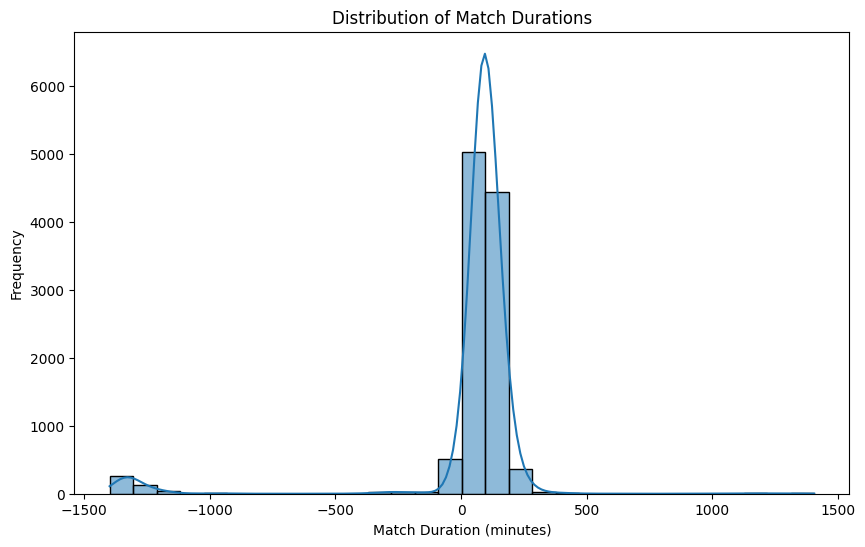

In [7]:
# Distribution of match durations
plt.figure(figsize=(10, 6))
sns.histplot(df['wh_minutes'], bins=30, kde=True)
plt.title('Distribution of Match Durations')
plt.xlabel('Match Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

In [8]:
# Check for negative values in the 'wh_minutes' column
negative_durations = df[df['wh_minutes'] < 0]
negative_durations.shape

(502, 12)

Strange that there are 502 matches with an associated negative wh_minutes. This by itself is not a reason to drop these rows. Just need to remember this case when using duration as a feature in further analysis

<Axes: title={'center': 'Top 10 highest number of matches played'}>

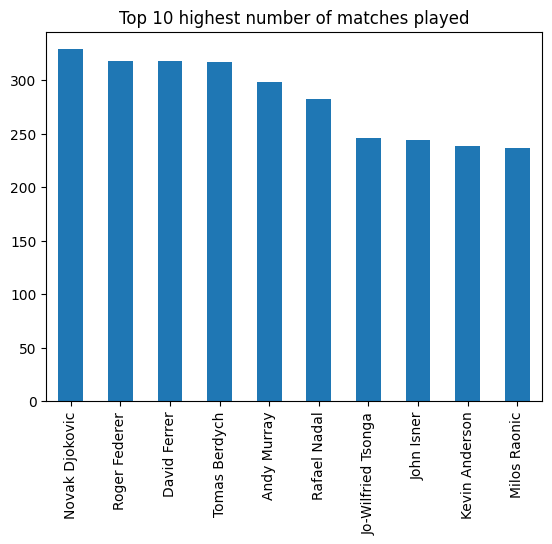

In [17]:
# get the top 10 players who played the most matches in this dataset. In order to do this, we should first concatenate the server1, server2 columns into 1 series so that we can then use value_counts
all_players = pd.concat([df['server1'], df['server2']])
all_players.value_counts().head(10).plot(kind='bar', title='Top 10 highest number of matches played')


<Axes: title={'center': 'Top 10 lowest number of matches played'}>

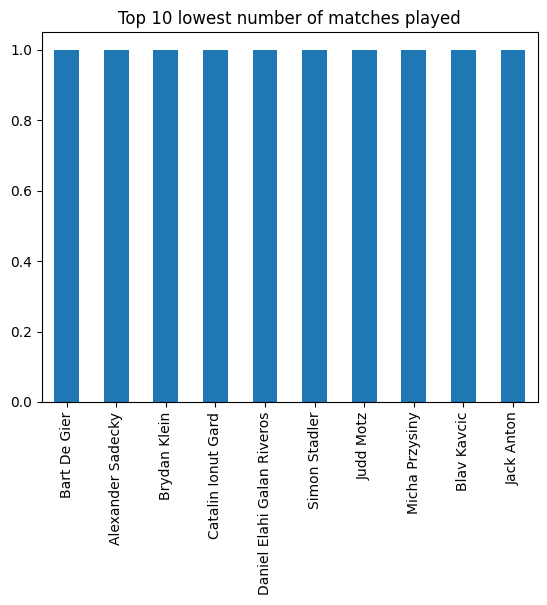

In [18]:
# bottom 10 players in terms of number of matches played
all_players.value_counts().sort_values(ascending=True).head(10).plot(kind='bar', title='Top 10 lowest number of matches played')

These players seem to have played just 1 match - not very representative of the average , active ATP tour player. So I want to see the bottom 10 lowest number of matches played amongst the players who at least played 20 matches

<Axes: title={'center': 'Lowest number of matches played'}>

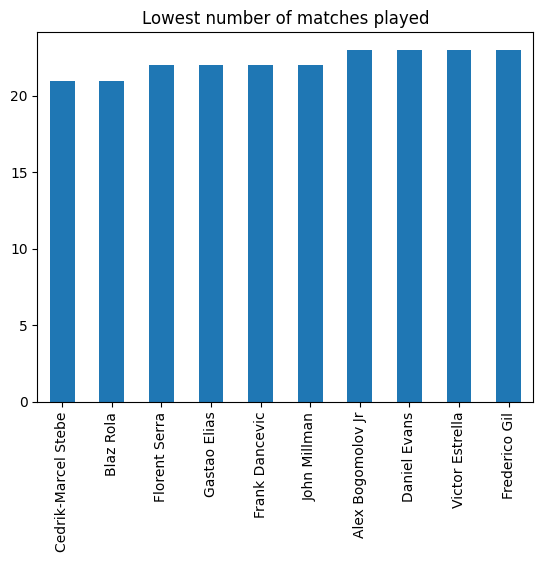

In [22]:
all_players.value_counts()[(all_players.value_counts() > 20)].sort_values(ascending=True).head(10).plot(kind='bar', title='Lowest number of matches played')

In [42]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [47]:
# Step 1: Set up Selenium and ChromeDriver
chromedriver_path = r'C:\Users\ssmovva\Downloads\chromedriver-win64\chromedriver-win64\chromedriver.exe'
service = Service(chromedriver_path)
options = webdriver.ChromeOptions()
options.add_argument('--headless')  # Run in headless mode
driver = webdriver.Chrome(service=service, options=options)

In [48]:
# Step 2: Open the web page
url = 'https://www.atptour.com/en/players/atp-head-2-head/roger-federer-vs-novak-djokovic/f324/d643'
driver.get(url)

In [49]:
# Step 3: Wait for the table to be rendered
wait = WebDriverWait(driver, 10)
wait.until(EC.presence_of_element_located((By.CLASS_NAME, 'event-breakdown-list')))

<selenium.webdriver.remote.webelement.WebElement (session="51dc595e4e146529c484b7b0f7febf38", element="f.6275ADF7E94013C08FD230C11D42091A.d.54CE7003FA7FFB82D4009ABEA4BC7E13.e.30199")>

In [50]:
# Step 4: Extract the rendered HTML
html_content = driver.page_source
driver.quit()

In [51]:
# Step 5: Parse the HTML with BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

In [40]:
# Step 5: Extract data rows from the <tbody>
rows = []
tbody = table.find('tbody')

# Check if tbody exists
if tbody:
    for row in tbody.find_all('tr'):
        columns = row.find_all('td')
        row_data = [col.text.strip() for col in columns]
        rows.append(row_data)
else:
    print("No <tbody> found in the table.")

# Print the extracted rows for debugging
print("Extracted rows:")
for row in rows:
    print(row)

Extracted rows:
['{{event.year}}', '{{event.winner.playerFirstName}} {{event.winner.playerLastName}}\n{{event.winner.partnerFirstName}} {{event.winner.partnerLastName}}\n\n\n\n\n\n\n{{event.winner.playerFirstName}} {{event.winner.playerLastName}}', '{{event.event}}', '{{event.round}}', '{{event.surface}}', '{{event.score}} {{ event.reason }}', 'Results\nDraws']


In [52]:
# Step 6: Identify the specific table within the div with class 'event-breakdown-list'
div = soup.find('div', class_='event-breakdown-list')
table = div.find('table')

In [53]:
# Step 7: Extract column names from the <thead>
headers = []
thead = table.find('thead')
for th in thead.find_all('th'):
    headers.append(th.text.strip())

In [54]:
headers

['Year', 'Winner', 'Event', 'Round', 'Surface', 'Score', 'View details']

In [55]:
# Step 8: Extract data rows from the <tbody>
rows = []
tbody = table.find('tbody')
for row in tbody.find_all('tr'):
    columns = row.find_all('td')
    row_data = [col.text.strip() for col in columns]
    rows.append(row_data)

# Step 9: Store data in a DataFrame
df = pd.DataFrame(rows, columns=headers)

In [56]:
df.head()

,Year,Winner,Event,Round,Surface,Score,View details
0,2020,Novak Djokovic,Australian Open,Semifinal,Outdoor Hard,76(1) 64 63,ResultsDraws
1,2019,Roger Federer,Nitto ATP Finals,Round Robin,Indoor Hard,64 63,ResultsDraws
2,2019,Novak Djokovic,Wimbledon,Final,Outdoor Grass,76(5) 16 76(4) 46 1312(3),ResultsDraws
3,2018,Novak Djokovic,ATP Masters 1000 Paris,Semifinal,Indoor Hard,76(6) 57 76(3),ResultsDraws
4,2018,Novak Djokovic,ATP Masters 1000 Cincinnati,Final,Outdoor Hard,64 64,ResultsDraws


In [57]:
# Save to CSV
df.to_csv('atp_event_breakdown.csv', index=False)

In [58]:
df.shape

(51, 7)

In [61]:
#Create One-Hot Encoded Columns for the winners so i can use this to calculate win rate for plotting
one_hot = pd.get_dummies(df['Winner'], prefix='one_hot_winner')
df = pd.concat([df, one_hot], axis=1)

In [62]:
df.head()

,Year,Winner,Event,Round,Surface,Score,View details,one_hot_winner_Novak Djokovic,one_hot_winner_Roger Federer
0,2020,Novak Djokovic,Australian Open,Semifinal,Outdoor Hard,76(1) 64 63,ResultsDraws,True,False
1,2019,Roger Federer,Nitto ATP Finals,Round Robin,Indoor Hard,64 63,ResultsDraws,False,True
2,2019,Novak Djokovic,Wimbledon,Final,Outdoor Grass,76(5) 16 76(4) 46 1312(3),ResultsDraws,True,False
3,2018,Novak Djokovic,ATP Masters 1000 Paris,Semifinal,Indoor Hard,76(6) 57 76(3),ResultsDraws,True,False
4,2018,Novak Djokovic,ATP Masters 1000 Cincinnati,Final,Outdoor Hard,64 64,ResultsDraws,True,False


In [71]:
# calculate winning rate - grouped by year
winning_rate = df.groupby('Year')[one_hot.columns].mean().reset_index()


In [87]:
# calculate number of matches per year
num_matches = df.groupby('Year').size().reset_index(name='num_matches')
num_matches['Year'] = num_matches['Year'].astype(int)

In [88]:
# Merge the number of matches with the winning rate DataFrame
winning_rate = pd.merge(winning_rate, num_matches, on='Year')


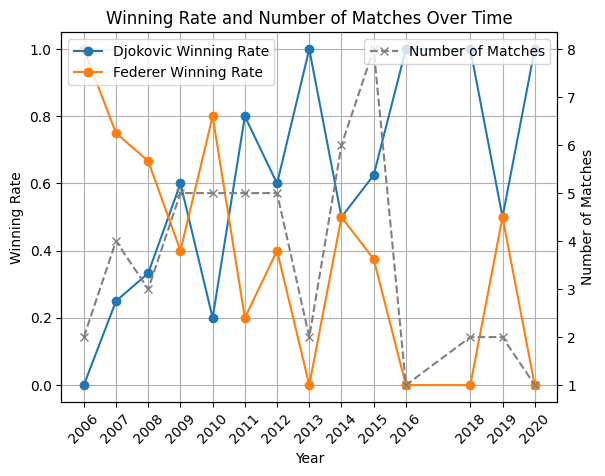

In [90]:
winning_rate['Year'] = winning_rate['Year'].astype(int)
fig, ax1 = plt.subplots()

# Plot winning rate
ax1.set_xlabel('Year')
ax1.set_ylabel('Winning Rate')
ax1.plot(winning_rate['Year'], winning_rate['one_hot_winner_Novak Djokovic'], label='Djokovic Winning Rate', marker='o')
ax1.plot(winning_rate['Year'], winning_rate['one_hot_winner_Roger Federer'], label='Federer Winning Rate', marker='o')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(loc='upper left')
ax1.grid(True)
# Ensure every year is displayed on the x-axis
ax1.set_xticks(winning_rate['Year'])

# Create a second y-axis for the number of matches
ax2 = ax1.twinx()
ax2.set_ylabel('Number of Matches')
ax2.plot(winning_rate['Year'], winning_rate['num_matches'], label='Number of Matches', color='gray', linestyle='--', marker='x')
ax2.legend(loc='upper right')

plt.title('Winning Rate and Number of Matches Over Time')
plt.show()

In [91]:
# getting match summary data of all the atp matches from Jeff Sackmans github repo
import requests
import pandas as pd
from io import StringIO


In [95]:
# Replace with your GitHub repository details
user = 'JeffSackmann'
repo = 'tennis_atp'
branch = 'master'

In [93]:
# List of CSV file paths in the repository that i am interested in - I am interested only in 
# Fed-Novak matches, so starting in 2006 till 2020
csv_files = [
    'atp_matches_2006.csv','atp_matches_2007.csv','atp_matches_2008.csv',
    'atp_matches_2009.csv','atp_matches_2010.csv','atp_matches_2011.csv',
    'atp_matches_2012.csv','atp_matches_2013.csv','atp_matches_2014.csv',
    'atp_matches_2015.csv','atp_matches_2016.csv','atp_matches_2017.csv',
    'atp_matches_2018.csv','atp_matches_2019.csv','atp_matches_2020.csv'

]

In [96]:
csv_base_url = f'https://raw.githubusercontent.com/{user}/{repo}/{branch}/'

In [97]:
csv_base_url

'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/'

In [98]:
dfs = []

for csv_file in csv_files:
    url = csv_base_url + csv_file
    response = requests.get(url)
    if response.status_code == 200:
        csv_data = StringIO(response.text)
        df = pd.read_csv(csv_data)
        dfs.append(df)
    else:
        print(f"Failed to fetch {csv_file}")


In [103]:
type(dfs[0])

pandas.core.frame.DataFrame

In [109]:
#seeing if shape of all the files is the same
total_rows = 0
for i in range(len(dfs)):
    print(dfs[i].shape)
    total_rows += dfs[i].shape[0]
print(f'total rows = {total_rows}')

(3267, 49)
(3192, 49)
(3123, 49)
(3085, 49)
(3030, 49)
(3015, 49)
(3009, 49)
(2944, 49)
(2901, 49)
(2943, 49)
(2941, 49)
(2911, 49)
(2897, 49)
(2806, 49)
(1462, 49)
total rows = 43526


In [110]:
#okay the number of columns is the same, thats good. 
#concatenate all data into 1 file and then just take the subset of the 50 odd matches 
# that fed and novak played against eachother
df_concat = pd.DataFrame()
for i in range(len(dfs)):
    df_concat = pd.concat([df_concat, dfs[i]])

df_concat.shape


(43526, 49)

In [111]:
df_concat.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2006-1536,Madrid Masters,Hard,48,M,20061016,1,103454,NaN,NaN,...,35.0,25.0,8.0,9.0,1.0,4.0,45.0,795.0,20.0,1245.0
1,2006-1536,Madrid Masters,Hard,48,M,20061016,2,104417,NaN,NaN,...,35.0,22.0,10.0,9.0,6.0,8.0,29.0,988.0,32.0,950.0
2,2006-1536,Madrid Masters,Hard,48,M,20061016,3,104068,NaN,NaN,...,40.0,30.0,17.0,12.0,3.0,6.0,47.0,775.0,81.0,501.0
3,2006-1536,Madrid Masters,Hard,48,M,20061016,4,103428,NaN,NaN,...,30.0,21.0,6.0,8.0,3.0,6.0,35.0,915.0,43.0,825.0
4,2006-1536,Madrid Masters,Hard,48,M,20061016,5,103898,NaN,Q,...,25.0,12.0,8.0,7.0,2.0,6.0,46.0,785.0,107.0,397.0


In [115]:
#getting just the subset of matches where Fed played Novak
player_list = ['Roger Federer','Novak Djokovic']
df_concat_subset = df_concat.query('winner_name in @player_list and loser_name in @player_list')

In [117]:
#this should be about 50 matches from the ATP official website. check that
df_concat_subset.shape[0]

51

In [118]:
# get a head to head record - Djokovic won 27 matches, 1 was walk over. Somehow the ATP site doesnt count that 
# towards his win loss. It says 27-23, but with the walk over Novak got, 28-23 is accurate
df_concat_subset.winner_name.value_counts()

winner_name
Novak Djokovic    28
Roger Federer     23
Name: count, dtype: int64

In [119]:
# check all the columns and dtypes
df_concat_subset.dtypes

tourney_id             object
tourney_name           object
surface                object
draw_size               int64
tourney_level          object
tourney_date            int64
match_num               int64
winner_id               int64
winner_seed           float64
winner_entry           object
winner_name            object
winner_hand            object
winner_ht             float64
winner_ioc             object
winner_age            float64
loser_id                int64
loser_seed            float64
loser_entry            object
loser_name             object
loser_hand             object
loser_ht              float64
loser_ioc              object
loser_age             float64
score                  object
best_of                 int64
round                  object
minutes               float64
w_ace                 float64
w_df                  float64
w_svpt                float64
w_1stIn               float64
w_1stWon              float64
w_2ndWon              float64
w_SvGms   